Regresión Logistica multinomial


Para el desarrollo del caso en el punto de la realización de la regresión nos basamos en el codigo de  (Restrepo, 2021) 

In [61]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# cargamos el dataset
iris = load_iris()

# Imprimimos especies y características
print(iris.target_names)
print(iris.feature_names)
## obtenido de (Restrepo, 2021)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [62]:
# Creamos dataframe para los datos
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()
## obtenido de (Restrepo, 2021)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
# Dividimos los datos en variables independientes X, y variable dependiente y (especies)
X = data.drop(["species"],axis = 1)
y = data.species
## obtenido de (Restrepo, 2021)
     

In [64]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
## obtenido de (Restrepo, 2021)

In [65]:
# Definimos la configuración del clasificador
from sklearn.linear_model import LogisticRegression
logisticRegrIris = LogisticRegression(max_iter=1000)
## obtenido de (Restrepo, 2021)

entrenamiento

In [66]:
logisticRegrIris.fit(X_train, y_train)
## obtenido de (Restrepo, 2021)

LogisticRegression(max_iter=1000)

Predicción

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.95      0.97        19
           2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



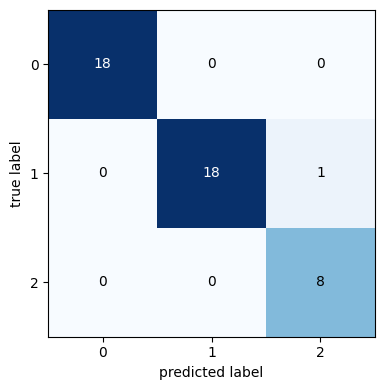

In [67]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
ypred = logisticRegrIris.predict(X_test)
matriz = confusion_matrix(y_test,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()
print(classification_report(y_test, ypred))
## obtenido de (Restrepo, 2021)

                                                            Conclusión
Podemos observar que el modelo de la regresión logística multinomial fue capaz de clasificar un total de 45 datos con una precisión del 98%, lo que quiere decir que el modelo es capaz de predecir las categorías categóricas de la variable dependiente. Además, se puede concluir que la precisión, el f1-score y el support fueron los menores en la clase 3. No obstante el f1-core al ser 0.94 sugiere que realiza una gran tarea en la clasificación. Por otro lado, el support de la tercera categoría indica que solo hay 9 observaciones del modelo en comparación con las 19 observaciones de las otras 2 clases.  Igualmente, el modelo presenta un positivo negativo en la clase 2 donde confunde una observación con la clase 3.

                                    KNN

In [68]:
import pandas as pd
from sklearn import datasets
import seaborn as sns


# Importamos los datos y creamos un data frame

iris = sns.load_dataset("iris")

df=pd.DataFrame(iris)

In [69]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [70]:

#Creamos las varibles de predicción y de respuesta
x_1=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_1=df['species']

Utilizaremos de nuevo el valor estándar de Scikit-Learn de 75% de datos de entrenamiento y 25% de datos de prueba. Esto significa que tendremos el mismo número de registros de entrenamiento y de prueba que en la regresión anterior.

In [71]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.40, random_state=SEED)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 90 datos para entrenamiento y 60 datos para prueba


Dado que estamos tratando con el mismo conjunto de datos sin procesar y sus diferentes unidades de medida, realizaremos de nuevo el escalado de características.

In [72]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Después de agrupar, dividir y escalar los datos, podemos aplicarles un clasificador. Para la predicción, utilizaremos de nuevo 5 vecinos como línea de base. También puede instanciar la clase KNeighbors_ sin ningún argumento y automáticamente utilizará 5 vecinos. Aquí, en lugar de importar el KNeighborsRegressor, importaremos el KNeighborsClassifier, clase

In [73]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [75]:
acc =  classifier.score(X_test, y_test)
print(acc) 

0.9833333333333333


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



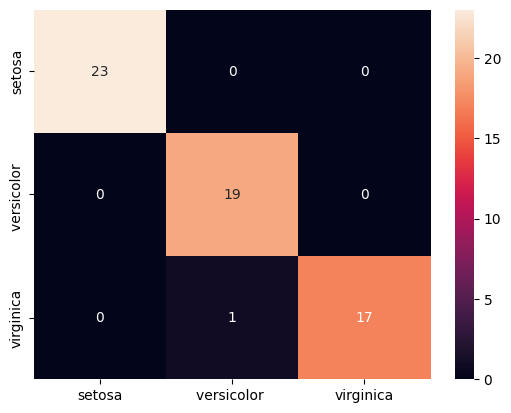

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

# Adding classes names for better interpretation
classes_names = ['setosa','versicolor ','virginica']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

None 0.8133333333333334
0.2 0.82


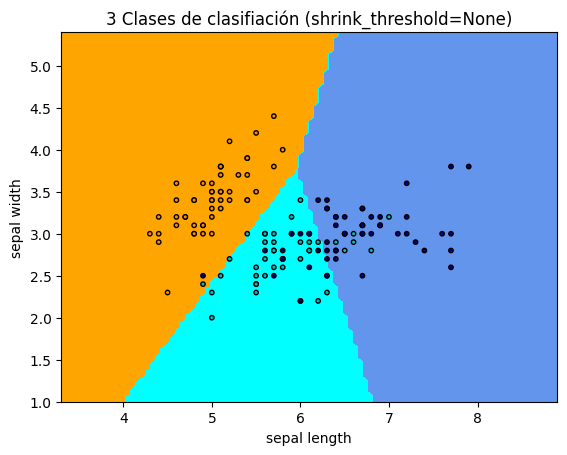

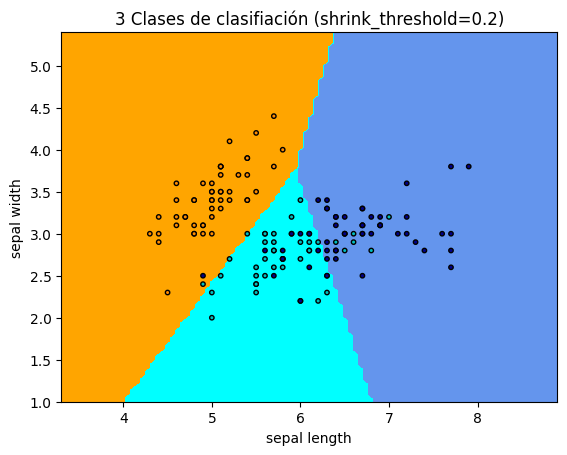

In [77]:
import numpy as np
from matplotlib.colors import ListedColormap


from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# Suponiendo que X es un DataFrame de pandas
X_2d = X.iloc[:, :2]
y = data.species


# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3 Clases de clasifiación (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()

Encontramos en el mejor K

In [78]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 3 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

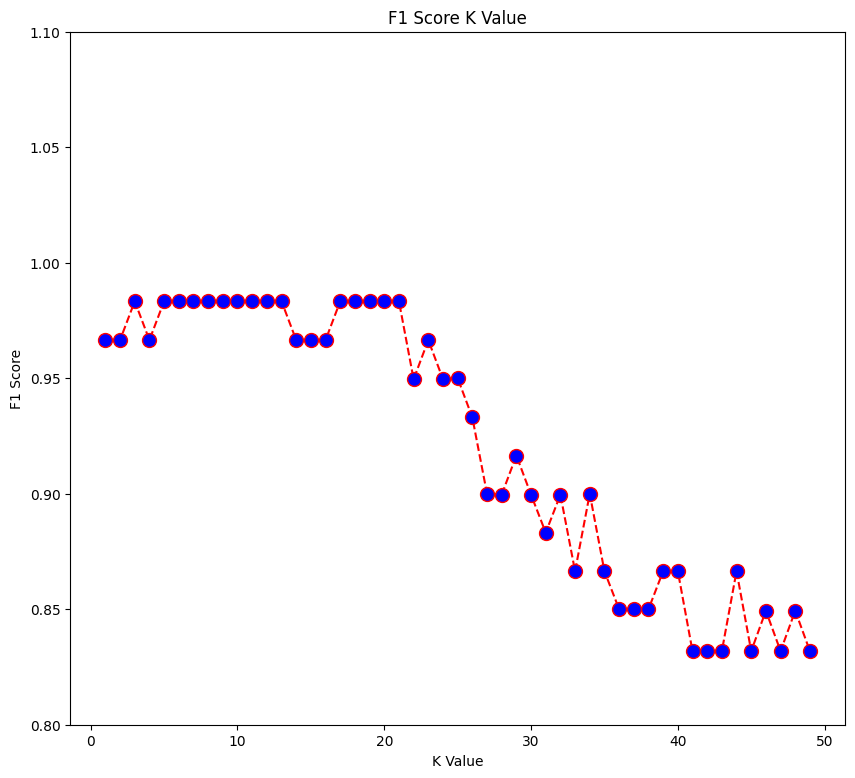

In [79]:
plt.figure(figsize=(10, 9))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.ylim(0.8, 1.1)
plt.show()

In [80]:
classifier15 = KNeighborsClassifier(n_neighbors=10)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Conclusiones:
Los resultados muestran que KNN fue capaz de clasificar los 38 registros del conjunto de prueba con una precisión del 79%, por encima de la media. También podemos ver el resultado de las métricas para cada una de las 3 clases. A partir de ahí, podemos observar que la clase 2 tiene la precisión, la recuperación y la puntuación f1 más bajas. La clase 3 está justo detrás de la clase 2 por tener las puntuaciones más bajas, y luego, tenemos la clase 1 con las mejores puntuaciones.

Observando la matriz de confusión, podemos ver que

la clase 1 no se confundió con ninguna clase 
la clase 2 por la clase 3 en 4 entradas
la clase 3 se confundió mayoritariamente con la clase 2, en 4 entradas
Obsérvese también que la diagonal muestra los valores positivos verdaderos; al observarla, es evidente que las clases 2 y 3 tienen los valores predichos menos correctos.


                               Conclusiones generales

Regresión VS KNN

                                  Referencias
Restrepo, D. (1 de febrero de 2021). github. Obtenido de https://github.com/DavidReveloLuna/Machine-Learning/blob/master/3_2_RegresionLogistica.ipynb

